In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Lambda(y):
    "logit map" 
    return np.exp(y) / np.sum(np.exp(y))

In [3]:
def EXP3(v, gamma, T):
    v_A = v[0]
    v_B = v[1]
    y_t = np.array([0.0, 0.0])
    x_t = np.array([0.0, 0.0])
    payoffs = [] # cumulative payoffs
    for t in range(1, T+1):
        x_t = Lambda(y_t) # mixed strategy
        a = np.random.choice(['A', 'B'], p=x_t) # take action based on mixed strategy
        v_hat = np.array([v_A[t-1]/x_t[0], 0.0]) if a == 'A' else np.array([0.0, v_B[t-1]/x_t[1]]) # computing IWE
        y_t = y_t + gamma*v_hat # update step
        p = v_A[t-1] if a == 'A' else v_B[t-1] # computing payoffs
        payoffs.append(payoffs[-1] + p if payoffs else p)
    return payoffs, payoffs[-1]

In [4]:
def EXP3_expl(v, eta, eps, T):
    v_A = v[0]
    v_B = v[1]
    y_t = np.array([0.0, 0.0])
    x_t = np.array([0.0, 0.0])
    payoffs = [] # cumulative payoffs
    for t in range(1, T+1):
        x_t = (1-eps)*Lambda(y_t) + eps/2 # mixed strategy
        a = np.random.choice(['A', 'B'], p=x_t) # take action based on mixed strategy
        v_hat = np.array([v_A[t-1]/x_t[0], 0.0]) if a == 'A' else np.array([0.0, v_B[t-1]/x_t[1]]) # computing IWE
        y_t = y_t + eta*v_hat # update step
        p = v_A[t-1] if a == 'A' else v_B[t-1] # computing payoffs
        payoffs.append(payoffs[-1] + p if payoffs else p)
    return payoffs, payoffs[-1]

In [5]:
T = 500 # total number of stages
# lists of payoffs (v_t = [v_A[t], v_B[t]])
v_A = [0 if i % 2 == 1 else 1 for i in range(1, T+1)]
v_B = [1 - v for v in v_A]
v = [v_A, v_B]

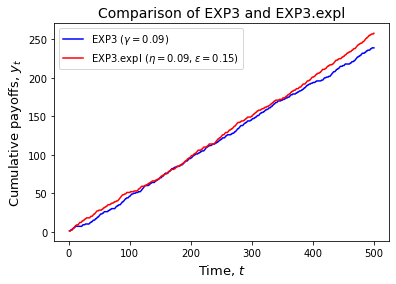

In [6]:
gamma = 0.09 # for EXP3
# for EXP3_expl:
eta = 0.09
eps = 0.15
plt.plot(range(1, T+1), EXP3(v, gamma, T)[0], label='EXP3 ($\gamma={}$)'.format(gamma), c='b')
plt.plot(range(1, T+1), EXP3_expl(v, eta, eps, T)[0], label='EXP3.expl ($\eta={}, \epsilon={}$)'.format(eta, eps), c='r')
plt.xlabel('Time, $t$', fontsize=13)
plt.ylabel('Cumulative payoffs, $y_t$', fontsize=13)
plt.title('Comparison of EXP3 and EXP3.expl', fontsize=14)
plt.legend()
plt.savefig("Comparison.pdf")
plt.show()

In [7]:
# create grid of parameters
list_gamma = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
list_eps = [0.01, 0.05, 0.1, 0.5, 0.9]

payoffs_exp3 = []
payoffs_exp3_expl = []

for gamma in list_gamma:
    payoffs_exp3.append(EXP3(v, gamma=gamma, T=T)[1])
    payoffs_exp3_expl_tmp = []
    for eps in list_eps:
        payoffs_exp3_expl_tmp.append(EXP3_expl(v, eta=gamma, eps=eps, T=T)[1])
    payoffs_exp3_expl.append(payoffs_exp3_expl_tmp)

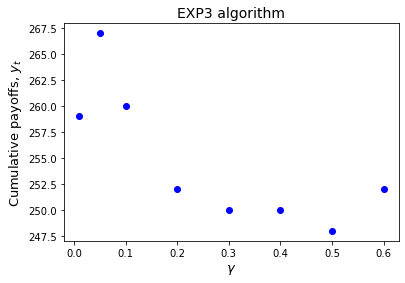

In [8]:
plt.scatter(list_gamma, payoffs_exp3, c='b')
plt.xlabel("$\gamma$", fontsize=13)
plt.ylabel("Cumulative payoffs, $y_t$", fontsize=13)
plt.title("EXP3 algorithm", fontsize=14)
plt.savefig("EXP3_params.pdf")
plt.show()

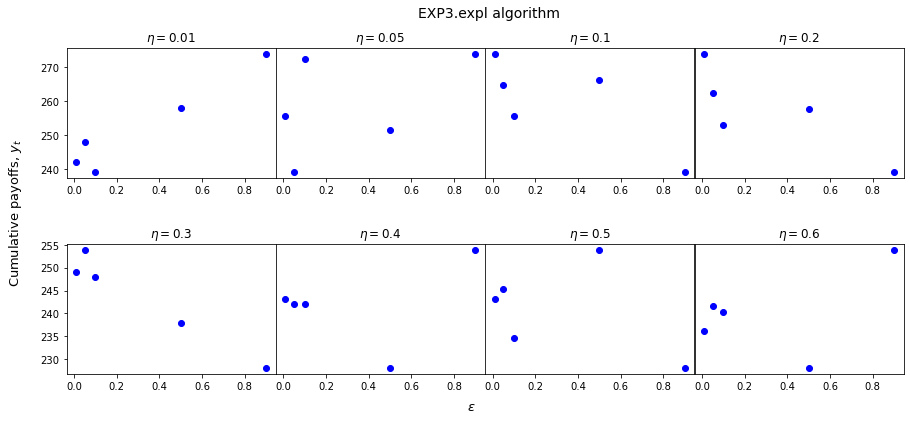

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(8):
    axs[i].scatter(list_eps, payoffs_exp3_expl[i], c='b')
    if i != 0 and i != 4: axs[i].set_yticks([])
    axs[i].set_title("$\eta={}$".format(list_gamma[i]))

fig.text(0.45, 0.95, "EXP3.expl algorithm", fontsize=14)
fig.text(0.5, 0.04, '$\epsilon$', ha='center', fontsize=13)
fig.text(0.07, 0.5, 'Cumulative payoffs, $y_t$', va='center', rotation='vertical', fontsize=13)

plt.savefig("EXP3_expl_params.pdf")
plt.show()